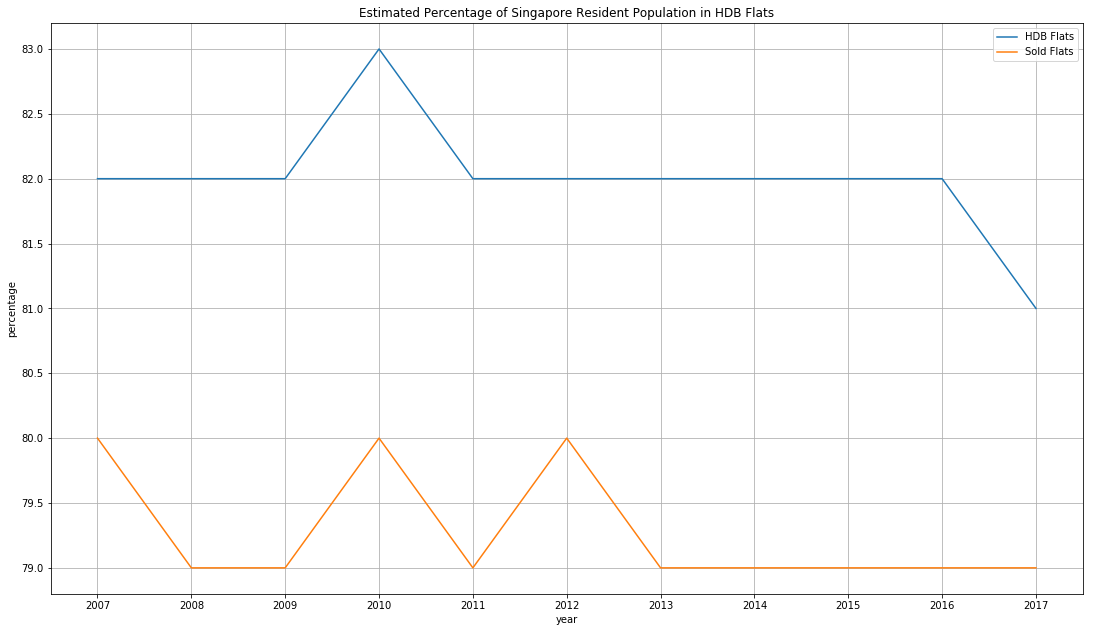

TypeError: 'numpy.ndarray' object is not callable

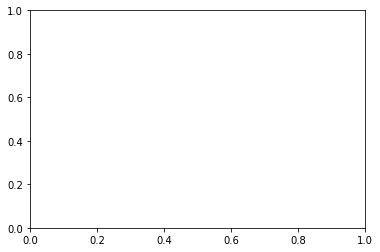

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the csv file with the loadtxt() function
fname = "data/estimated-percentage-of-singapore-resident-population-in-hdb-flats.csv"
data = np.loadtxt(fname, skiprows=1,dtype=[('financial_year','i8'), ('type','U50'), 
                                           ('percentage_of_pop_in', 'i8')],delimiter=",")

### Get data for sold-flats 
keyword = 'Sold Flats'
column_to_search = data['type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_sold_flats = data[out]
data_sold_percent = data_sold_flats['percentage_of_pop_in']

### Get data for HDB-flats 
keyword = 'HDB Flats'
column_to_search = data['type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_HDB_flats = data[out]
data_HDB_percent = data_HDB_flats['percentage_of_pop_in']
data_year = data_HDB_flats['financial_year']

def linePercentSing():
    fig, ax = plt.subplots()
    year = data_year
    hdb = data_HDB_percent
    sold = data_sold_percent
    line1 = ax.plot(year,hdb, label='HDB Flats')
    line2 = ax.plot(year,sold, label='Sold Flats')
    ax.set_xticks(year)
    ax.set(xlabel='year', ylabel='percentage',
           title='Estimated Percentage of Singapore Resident Population in HDB Flats')
    ax.grid()
    ax.legend()
    fig.set_size_inches(18.5, 10.5)
    plt.show()

    
linePercentSing()

mean_HDB = data_HDB_percent.mean()
mean_Sold = data_sold_percent.mean()




print("The mean percentage of Singapore Resident Population in HDB Flats is {:.2f}%.".format(mean_HDB))
print("The mean percentage of Singapore Resident Population in Sold Flats is {:.2f}%.".format(mean_Sold))

print("There are " + str(len(data)) + " rows of data in this dataset.")


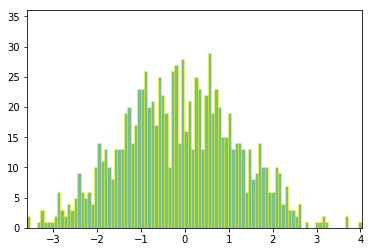

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 100, repeat=True, blit=True)
plt.show()

